# Sales Prediction (Simple Linear Regression)

In [29]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings   # Suppressing Warnings
warnings.filterwarnings('ignore')


#### Read the DataFrames from CSV files

In [59]:
advrt_data =pd.read_csv(r"E:\onedrive world\OneDrive\Desktop\INTERNSHIP'S\Cod_Soft INTERNSHIP\Project - Sales Prediction (advertisement dataset)\Data set\advertising.csv")


In [61]:
advrt_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


#### Data Inspection 

In [64]:
advrt_data.shape

(200, 4)

In [66]:
advrt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [68]:
advrt_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


#### Data Cleaning

In [75]:
# Checking Null values
advrt_data.isnull().sum()*100/advrt_data.shape[0]
# There are no NULL values in the dataset, hence it is clean.

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

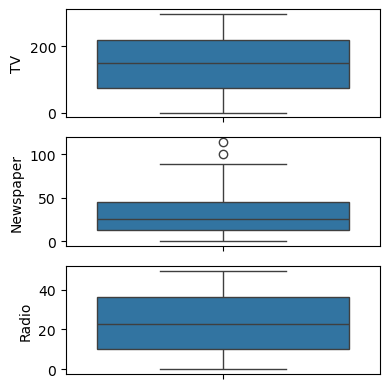

In [81]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (4,4))
plt1 = sns.boxplot(advrt_data['TV'], ax = axs[0])
plt2 = sns.boxplot(advrt_data['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(advrt_data['Radio'], ax = axs[2])
plt.tight_layout()

In [90]:
# There are no considerable outliers present in the data.

#### Exploratory Data Analysis
- Univariate Analysis - 
  Sales (Target Variable)

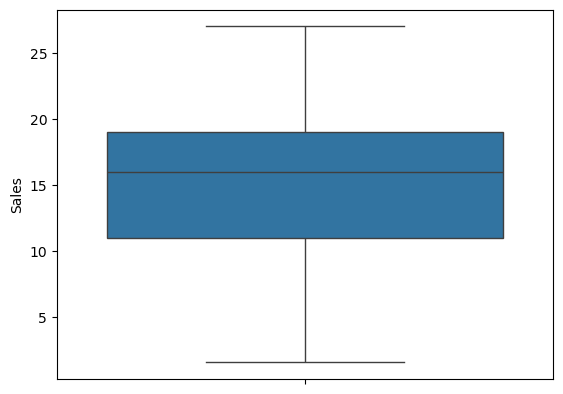

In [100]:
sns.boxplot(advrt_data['Sales'])
plt.show()

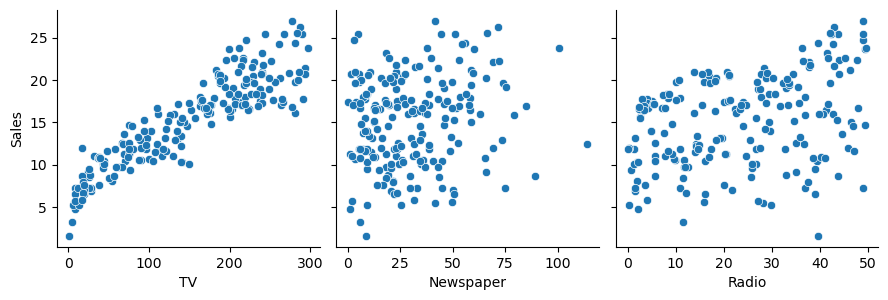

In [110]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(advrt_data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=3, aspect=1, kind='scatter')
plt.show()

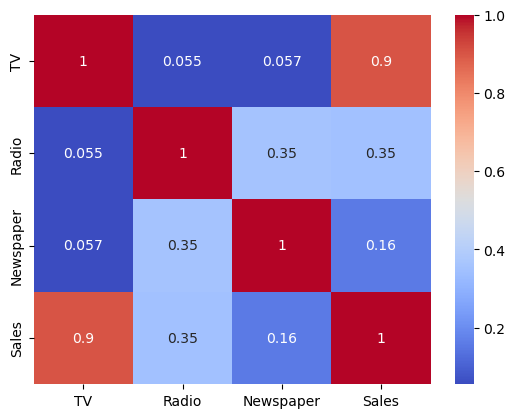

In [116]:
# Let's see the correlation between different variables.
sns.heatmap(advrt_data.corr(), cmap="coolwarm",annot = True)
plt.show()

In [ ]:
# Based on the pairplot and heatmap analysis, it is evident that the TV variable has the strongest correlation with Sales. 
#  Therefore,we will proceed by performing simple linear regression, using TV as the predictor variable.

#### Building Model 
Simple Linear Regression

To begin, we designate the feature variable, in this case, TV, to the variable X, and 
the target variable, Sales, is assigned to the variable y.y.

In [119]:
X = advrt_data['TV']
y = advrt_data['Sales']

#### Train and Test Split


In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [128]:
# Let's take a look at the train dataset

X_train.head()

168    215.4
112    175.7
171    164.5
181    218.5
7      120.2
Name: TV, dtype: float64

In [130]:
y_train.head()

168    17.1
112    17.1
171    17.5
181    17.2
7      13.2
Name: Sales, dtype: float64

#### Building a Linear Model 
The `statsmodels` library fits a line through the origin by default. 
However, to include an intercept in your model, you need to manually apply the `add_constant` attribute from `statsmodels`.
After adding this constant to your `X_train` data, you can proceed to fit a regression line using the `OLS` (Ordinary Least Squares) method.

In [139]:
import statsmodels.api as sm

In [141]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [149]:
# Output the parameters, including the intercept and slope of the fitted regression line
lr.params

const    6.995533
TV       0.054105
dtype: float64

In [151]:
# Executing a summary operation displays all the various parameters of the fitted regression line
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     727.7
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           5.03e-61
Time:                        02:05:55   Log-Likelihood:                -359.57
No. Observations:                 160   AIC:                             723.1
Df Residuals:                     158   BIC:                             729.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9955      0.343     20.386      0.0

####
the coefficient for TV is  0.054105 , with a very low p value¶
The coefficient is statistically significant. So the association is not purely by chance.

2. R - squared is  0.822
Meaning that 82.2% of the variance in Sales is explained by TV

This is a decent R-squared value.

####
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

Sales=6.9955 + 0.0541 ×TV

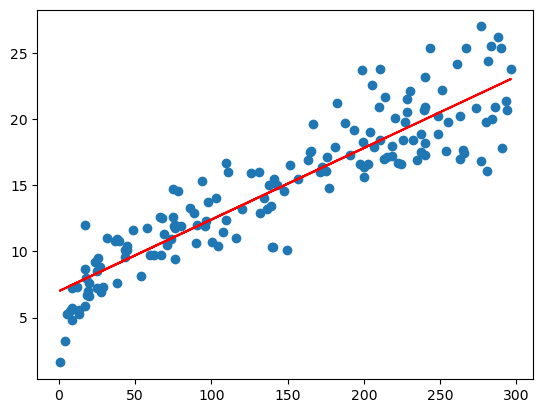

In [156]:
plt.scatter(X_train, y_train)
plt.plot(X_train,6.9955  + 0.0541*X_train, 'r')
plt.show()

#### Model Evaluation

In [159]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

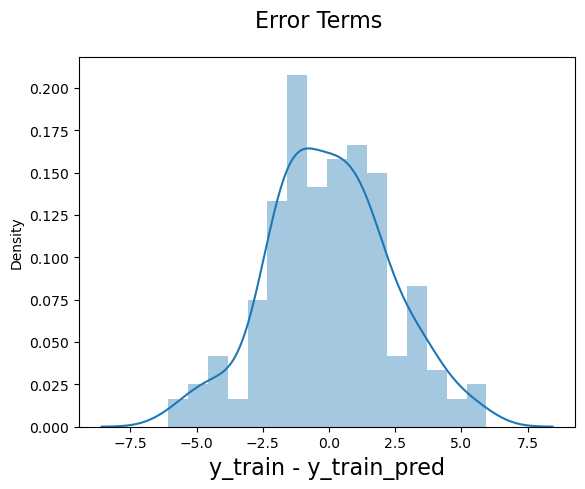

In [169]:
fig = plt.figure()
sns.distplot(res, bins = 16)
fig.suptitle('Error Terms', fontsize = 16)                # Plot heading - [Error Terms -difference between the actual values and the predicted values.]
plt.xlabel('y_train - y_train_pred', fontsize = 16)       # X-label
plt.show()

####
The residuals are following the normally distributed with a mean 0. All good!

Looking for patterns in the residuals

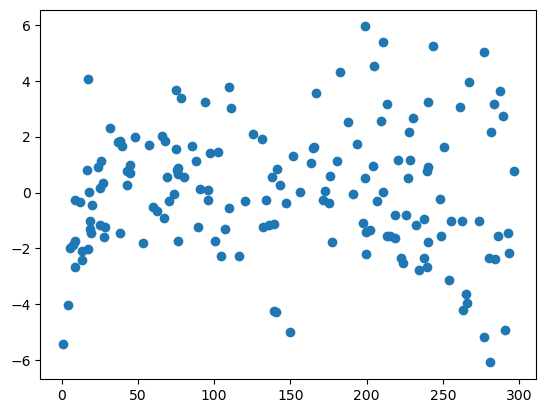

In [172]:
plt.scatter(X_train,res)
plt.show() 

####
We are confident that the model's fit is not due to random chance and exhibits reasonable predictive power. The normal distribution of the residuals allows for meaningful inference regarding the coefficients.

However, the increasing variance of the residuals as X grows suggests there is considerable variation that the model cannot fully account for.

Overall, the regression line appears to fit the data quite well.

Making Predictions on the Test Set
Now that the regression line has been fitted to the training data, it's time to generate predictions for the test data. First, add a constant to the X_test data, just as was done for X_train. Then, use the predict function from the fitted regression model to predict the corresponding y values for X_test.


In [175]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [177]:
y_pred.head()

126     7.417556
104    19.883459
99     14.310594
92     18.774296
111    20.072828
dtype: float64

In [179]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#### Looking at the RMSE

#### Returns the mean squared error, followed by taking the square root for evaluation


In [186]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.3126831803046097

In [190]:
# Checking the R-squared on the test set
r_squared = r2_score(y_test, y_pred)
r_squared

0.7281352744078886

#### Visualizing the fit on the test set

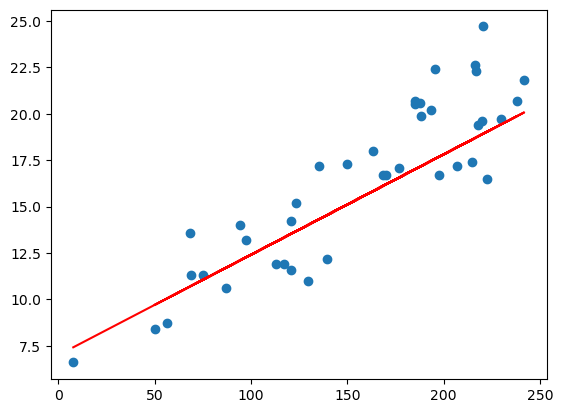

In [198]:
plt.scatter(X_test, y_test)
plt.plot(X_test,6.9955 + 0.0541 * X_test, 'r')
plt.show() 